In [ ]:
# @author: asmita chatterjee

# Source : kaggle.com

# dataset used :Concrete_Data.csv .We have 1030 observations on 9 variables


# Purpose: Find out the Complete compressive strength(CRS) 

#  Target variable : CMS 

# method used: MultipleLinear regression.

# A mathematical model for the prediction of compressive strength of high performance concrete is performed 
# using statistical analysis for the concrete data obtained from experimental work done in this study

### features present in the data set 
# Cement - kg in a m3 mixture
# Blast Furnace Slag - kg in a m3 mixture
# Fly Ash - kg in a m3 mixture
# Water - kg in a m3 mixture
# Superplasticizer - kg in a m3 mixture
# Coarse Aggregate - kg in a m3 mixture
# Fine Aggregate - kg in a m3 mixture
# Age - Day (1-365)



In [1]:
### import the packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline

In [3]:
### read the data 
data = pd.read_csv('C:/Users/USER/Documents/datasets/linear_regression/Concrete_Data.csv')

In [4]:
## Check for missing values 
data.isnull().any()
### no missing values 

Cement              False
Blast               False
Fly Ash             False
Water               False
Superplasticizer    False
CA                  False
FA                  False
Age                 False
CMS                 False
dtype: bool

In [5]:
data.describe()

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


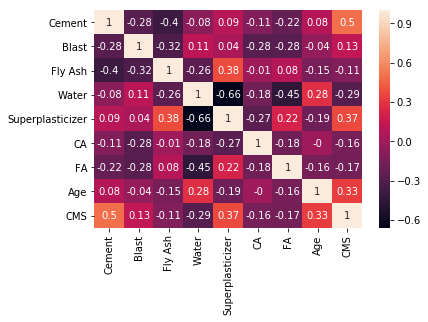

In [6]:
## Next check tthe correlation plot 

correlation_matrix = data.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [ ]:
# It seems  from correlation matrix that the variables 
# Superplasticizer and Water are bit highly correlated 

#  having  a correlation value 0.66.
 
#  We will not remove based the variables now . We will observe the VIF value later 

In [9]:
## Next check or outliers 
# for finding out outliers , we can  follow , 

# either box plot 
#  or 
#  z-score method
#   or 
#   IQR score method 
  
# --> we will use z score  method 

### Find out the z scores

from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data))
print(z)

[[2.47791487 0.85688789 0.84714393 ... 1.21767004 0.27973311 2.64540763]
 [2.47791487 0.85688789 0.84714393 ... 1.21767004 0.27973311 1.56142148]
 [0.49142531 0.79552649 0.84714393 ... 2.24091709 3.55306569 0.26662698]
 ...
 [1.27008832 0.75957923 0.85063487 ... 0.0801067  0.27973311 0.72572939]
 [1.16860982 1.30806485 0.84714393 ... 0.19116644 0.27973311 0.18253855]
 [0.19403325 0.30849909 0.3769452  ... 0.15074782 0.27973311 0.20469738]]


In [10]:
z.shape

(1030, 9)

In [11]:
data.shape

(1030, 9)

In [12]:
### we choose a thresold of 3  for detecting the outliers 

threshold = 3
print(np.where(z > 3))

(array([  2,   3,   4,   6,  12,  17,  24,  25,  26,  30,  31,  33,  34,
        35,  41,  42,  56,  60,  61,  63,  65,  66,  76,  79,  99, 102,
       122, 125, 145, 148, 168, 171, 553, 559, 571, 584, 604, 610, 616,
       620, 622, 756, 769, 792, 798, 814, 820, 873, 936], dtype=int64), array([7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 3, 3], dtype=int64))


In [13]:
### removing outliers

data_cleaned = data[(z < 3).all(axis=1)]

data_cleaned.shape

(981, 9)

In [14]:
### Now divide the data set 

X= data_cleaned.iloc[:,0:8]
Y = data_cleaned.iloc[:,8:]


In [15]:
X.columns

Index(['Cement', 'Blast', 'Fly Ash', 'Water', 'Superplasticizer', 'CA', 'FA',
       'Age'],
      dtype='object')

In [16]:
##Splitting the data into training and test sets

from sklearn.cross_validation import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 1000) 


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [17]:
# Running linear regression using statsmodels
# It is to be noted that statsmodels does not add intercept term automatically 
# thus we need to create an intercept to our model.
import statsmodels.api as sma


X_train = sma.add_constant(X_train) ## let's add an intercept (beta_0) to our model
X_test = sma.add_constant(X_test) 



C:\Users\USER\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [19]:
##Linear regression can be run by using sm.OLS:
import statsmodels.formula.api as sm
lm = sm.OLS(Y_train,X_train).fit()

In [20]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CMS   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     191.7
Date:                Thu, 02 May 2019   Prob (F-statistic):          2.47e-168
Time:                        01:07:51   Log-Likelihood:                -2503.2
No. Observations:                 686   AIC:                             5024.
Df Residuals:                     677   BIC:                             5065.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -20.3659     28.042     -0.726      0.468     -75.426      34.694
Cement               0.1168      0.009     13.073      0.000       0.099       0.134
Blast                0.0972      0.011      8.964      0.000       0.076       0.118
Fly Ash              0.0731      0.014      5.328      0.000       0.046       0.100
Water               -0.1403      0.043     -3.237      0.001      -0.225      -0.055
Superplasticizer     0.3808      0.112      3.407      0.001       0.161       0.600
CA                   0.0155      0.010      1.550      0.122      -0.004       0.035
FA                   0.0145      0.011      1.286      0.199      -0.008       0.037
Age                  0.2242      0.010     23.311      0.000       0.205       0.243
==============================================================================
Omnibus:                        8.372   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.015   Jarque-Bera (JB):               10.165
Skew:                          -0.154   Prob(JB):                      0.00621
Kurtosis:                       3.511   Cond. No.                     1.02e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
# here  we see that the p values for coeeff for  the following variables is more than 0.05- which is the estimated signficance limit
# CA 
# and
# FA
# we will drop 1   variable CA from  the X_train as well as X_test  and again call ols

X_train.columns

Index(['const', 'Cement', 'Blast', 'Fly Ash', 'Water', 'Superplasticizer',
       'CA', 'FA', 'Age'],
      dtype='object')

In [22]:
## drop CA and FA 
X_train = X_train.drop(['CA'], axis=1)

In [23]:
X_train.columns

Index(['const', 'Cement', 'Blast', 'Fly Ash', 'Water', 'Superplasticizer',
       'FA', 'Age'],
      dtype='object')

In [24]:
###drop CA  for test 
X_test = X_test.drop(['CA'], axis=1)
X_test.columns

Index(['const', 'Cement', 'Blast', 'Fly Ash', 'Water', 'Superplasticizer',
       'FA', 'Age'],
      dtype='object')

In [25]:
#### again run the model  with  X_train
lm2 = sm.OLS(Y_train,X_train).fit()

lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CMS   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     218.3
Date:                Thu, 02 May 2019   Prob (F-statistic):          5.32e-169
Time:                        01:09:27   Log-Likelihood:                -2504.4
No. Observations:                 686   AIC:                             5025.
Df Residuals:                     678   BIC:                             5061.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               20.5068      9.565      2.144      0.032       1.726      39.287
Cement               0.1061      0.006     18.613      0.000       0.095       0.117
Blast                0.0841      0.007     12.282      0.000       0.071       0.098
Fly Ash              0.0588      0.010      5.782      0.000       0.039       0.079
Water               -0.1933      0.027     -7.264      0.000      -0.246      -0.141
Superplasticizer     0.3282      0.107      3.079      0.002       0.119       0.537
FA                   0.0002      0.006      0.031      0.975      -0.013       0.013
Age                  0.2252      0.010     23.437      0.000       0.206       0.244
==============================================================================
Omnibus:                        8.521   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.014   Jarque-Bera (JB):               10.166
Skew:                          -0.164   Prob(JB):                      0.00620
Kurtosis:                       3.498   Cond. No.                     2.28e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.28e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
# frm the p values of all the variables ,  all the variables appear to be significant 
# except FA . so we wll drop FA 
X_train = X_train.drop(['FA'], axis=1)
X_test = X_test.drop(['FA'], axis=1)

In [27]:
#### again run the model  with  X_train

lm3 = sm.OLS(Y_train,X_train).fit()

In [28]:
lm3.summary()
### all variables appear to be significant now 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CMS   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     255.0
Date:                Thu, 02 May 2019   Prob (F-statistic):          3.19e-170
Time:                        01:10:25   Log-Likelihood:                -2504.4
No. Observations:                 686   AIC:                             5023.
Df Residuals:                     679   BIC:                             5055.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               20.7644      4.883      4.252      0.000      11.176      30.353
Cement               0.1060      0.005     22.983      0.000       0.097       0.115
Blast                0.0840      0.006     14.891      0.000       0.073       0.095
Fly Ash              0.0586      0.009      6.686      0.000       0.041       0.076
Water               -0.1936      0.025     -7.861      0.000      -0.242      -0.145
Superplasticizer     0.3289      0.104      3.170      0.002       0.125       0.533
Age                  0.2251      0.010     23.462      0.000       0.206       0.244
==============================================================================
Omnibus:                        8.530   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.014   Jarque-Bera (JB):               10.167
Skew:                          -0.164   Prob(JB):                      0.00620
Kurtosis:                       3.498   Cond. No.                     4.87e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
### calculating rsq and adjusted rsq on training data set 
print(lm3.rsquared, lm2.rsquared_adj)

0.692637721873745 0.6894648147797705


In [30]:
y_pred = lm3.predict(X_test) 

In [31]:
type(y_pred)

pandas.core.series.Series

In [32]:
# Calculate R-Squared and Adjusted R-Squared Manually on Test data
import numpy as np
Y_test_series = pd.to_numeric(Y_test.CMS, errors='coerce')
RSS = np.sum((y_pred - Y_test_series)**2)
y_mean = np.mean(Y_test_series)
TSS = np.sum((Y_test_series - y_mean)**2)
R2 = 1 - RSS/TSS
R2

0.7286795818807956

In [33]:
### finding out the number of rows in the xtest data set 
no_rows=X_test.shape[0]

### finding out the number of regressors . due to coeefint addded , we will subtract 1 
no_regressors=X_test.shape[1] - 1

In [34]:
adj_rsquared = 1 - (1 - R2) * ((no_rows - 1)/(no_rows-no_regressors-1))
adj_rsquared

0.7230270731699788

In [35]:
### now checking the assumptions 

## First assumption: checking multicollinearity 

## mention  dataframe of vif 
vif = pd.DataFrame()

In [36]:
### Now detecting multi collinearity 

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

vif["features"] = X_train.columns

In [37]:
vif.round(2) 

,VIF Factor,features
0,186.53,const
1,1.81,Cement
2,1.87,Blast
3,2.47,Fly Ash
4,1.92,Water
5,2.67,Superplasticizer
6,1.02,Age


In [38]:
# If we take a threshold value  of 2.5 , then we can drop variable Superplasticizer
# which has got  VIF value 2.67 

#  But the variable Superplasticizer appears to be a significant variable 
#  hence we dont drop this variable 

# We use Shapiro Wilk test  from scipy library to check the normality of residuals.
# Null Hypothesis: The residuals are normally distributed.
# Alternative Hypothesis: The residuals are not normally distributed.
lm3.resid

295     -2.041814
456     13.977696
10       2.044372
980      1.899307
150      6.527169
551     -3.091329
227     -9.759557
22      -8.593618
541     -3.938582
750      2.751273
955      6.022827
373     -0.552640
838     -6.609266
454      9.553757
665     -1.856920
268      2.975734
835    -12.497537
710      8.760997
885     -4.027993
392      0.338892
296      2.416088
107      1.590225
600      5.336954
230      7.057020
212      3.195438
1020     6.384089
705     -7.162602
954    -13.297473
238      7.329317
800      0.480665
          ...    
930     -3.422559
376      6.601019
265      5.868624
318     -6.243920
530     11.727927
701      0.021293
260      0.477568
986      5.204630
346      6.808579
330      8.611139
527     -8.269728
525    -17.999129
741      3.122077
324     -8.536247
251      4.520216
1023     3.042931
921     -7.730340
588     -8.546389
593     -1.666793
905     -6.254837
681      6.304932
477    -24.457247
815     -6.689621
380      3.227249
382     17

In [39]:
from scipy import stats
stats.shapiro(lm3.resid)

(0.9907867908477783, 0.0002759209892246872)

C:\Users\USER\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


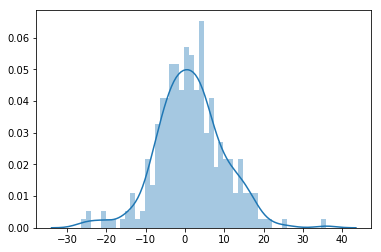

In [40]:
### p value :  0.0002759209892246872,
 ##hence  the 1st assumption is violated , that is  residulas are not normally distributed 

 ### let  us check the plot for the dstribution of residuals 
 
sns.distplot((Y_test_series-y_pred),bins=50) 
### The residula plot appears to be almost normal 

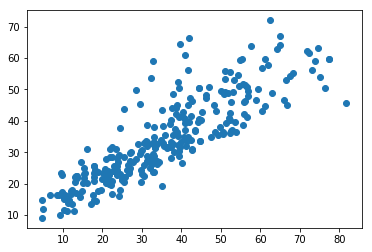

In [41]:
 plt.scatter(Y_test_series,y_pred)  

In [42]:
## Second check :### Checking for autocorrelation
# To ensure the absence of autocorrelation we use Ljungbox test.
# Null Hypothesis: Autocorrelation is absent.
# Alternative Hypothesis: Autocorrelation is present.
from statsmodels.stats import diagnostic as diag
diag.acorr_ljungbox(lm3.resid , lags = 1) 

### p value :0.21860418 hence there is no autocorrelation

## Hence assumption get satisfied 

(array([1.51351062]), array([0.21860418]))

In [43]:
##Checking heteroscedasticity Using Goldfeld Quandt we test for heteroscedasticity.
###Null Hypothesis: Error terms are homoscedastic
###Alternative Hypothesis: Error terms are heteroscedastic.
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(lm3.resid, lm3.model.exog)
lzip(name, test)

###The p-value is 0.5573827866798271 hence we can say that the residuals have constant variance

[('F statistic', 0.9843632905342186), ('p-value', 0.5573827866798271)]

In [ ]:
### hence , except the  normality f residuals , we find out that all the other assumptuons are satisfied
## for  linear regression
